In [2]:
# load data
%pylab
%matplotlib inline
import pandas as pd
from google.colab import files
uploaded = files.upload()

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


Saving University statistics - Overseas Chinese Summary.csv to University statistics - Overseas Chinese Summary.csv


In [35]:
import io
my_data = pd.read_csv(io.BytesIO(uploaded['University statistics - Overseas Chinese Summary.csv']),
                    header=0, index_col='School')
my_data.head()

,Country,System,Date,Total students number,Overseas Chinese students number,Percentage of All,Reference,Notes,Unnamed: 9,Unnamed: 10
School,,,,,,,,,,
US Total,US,Undergrad,2018,21900000.0,NaN,NaN,https://www.statista.com/statistics/235406/und...,NaN,NaN,NaN
US Total,US,Post-baccalaureate,2016,2972000.0,NaN,NaN,https://www.statista.com/statistics/236668/us-...,NaN,NaN,NaN
US Total,US,Un;post,2019,NaN,282276.0,0.011349,UG + PG,NaN,NaN,NaN
Stanford,US,Undergrad,2019,6996.0,NaN,NaN,https://facts.stanford.edu/,NaN,NaN,NaN
Stanford,US,Post-baccalaureate,2019,9390.0,NaN,NaN,https://facts.stanford.edu/,NaN,NaN,NaN


In [36]:
# Overseas Chinese student number & percentage
chinese = my_data[my_data['Overseas Chinese students number'].notnull()]
chinese['Overseas Chinese students number'] = chinese['Overseas Chinese students number'].astype(int)
chinese['Percentage of All'] = chinese['Percentage of All'].astype(float)
chinese_num_s = chinese.sort_values(by='Overseas Chinese students number', ascending=False)
chinese_pct_s = chinese.sort_values(by='Percentage of All', ascending=False)

num_of_country = 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Overseas Chinese student number


An indication of how many people we can ultimately reach



## By country

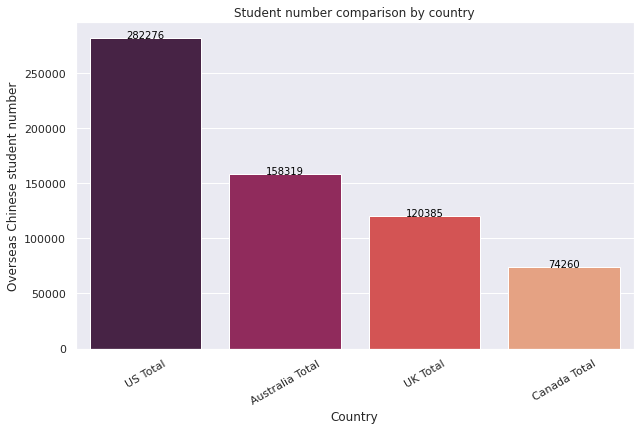

In [38]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.title("Student number comparison by country")

x=chinese_num_s.index[:num_of_country]
y=chinese_num_s['Overseas Chinese students number'][:num_of_country]
g = sns.barplot(x=x, y=y, palette="rocket")

plt.ylabel("Overseas Chinese student number")
plt.xlabel("Country")
plt.xticks(rotation=30)

for i, v in enumerate(y):
    g.text(i, v+1, str(v), color='black', ha='center')

## By university

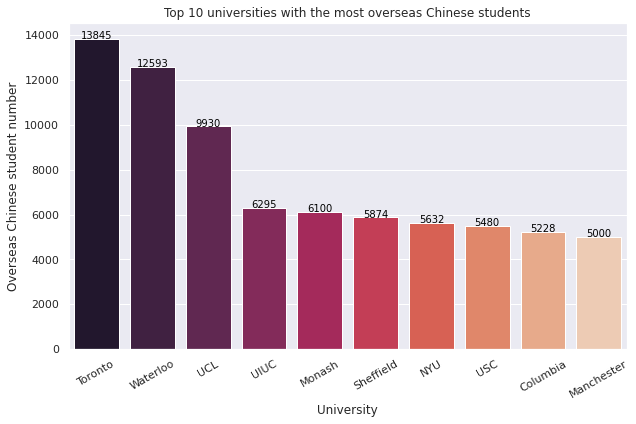

In [39]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.title("Top 10 universities with the most overseas Chinese students")

# Bar chart showing top 10 universities with the most overseas Chinese students
x=chinese_num_s.index[num_of_country:num_of_country+10]
y=chinese_num_s['Overseas Chinese students number'][num_of_country:num_of_country+10]
g = sns.barplot(x=x, y=y, palette="rocket")

plt.ylabel("Overseas Chinese student number")
plt.xlabel("University")
plt.xticks(rotation=30)

for i, v in enumerate(y):
    g.text(i, v+1, str(v), color='black', ha='center')

Text(0, 0.5, 'Overseas Chinese student number')

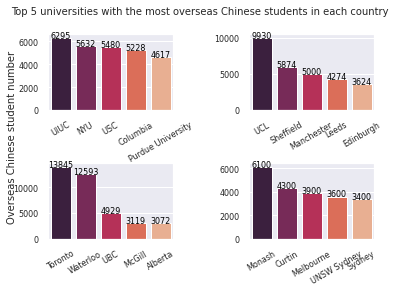

In [40]:
f, axes = plt.subplots(2, 2)
f.tight_layout(pad=3.0)

plt.suptitle("Top 5 universities with the most overseas Chinese students in each country", fontsize=10)

country_list = ['US', 'UK', 'Canada', 'Australia']

for id, country in enumerate(country_list):

  temp_chin_num_s = chinese_num_s[chinese_num_s['Country']==country]

  x=temp_chin_num_s.index[1:1+5]
  y=temp_chin_num_s['Overseas Chinese students number'][1:1+5]
  g = sns.barplot(x=x, y=y, palette="rocket", ax=axes[id // 2, id % 2])

  axes[id // 2, id % 2].set_xticklabels(labels=x, rotation=30)
  axes[id // 2, id % 2].tick_params(labelsize=8)
  axes[id // 2, id % 2].set_ylabel('')    
  axes[id // 2, id % 2].set_xlabel('')


  for i, v in enumerate(y):
      g.text(i, v+1, str(v), color='black', ha='center', fontsize=8)

# To add a common y label
sns.set_style('white')
f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Overseas Chinese student number", fontsize=10)

Text(0.5, 1.0, 'Categotical scatter plot by country')

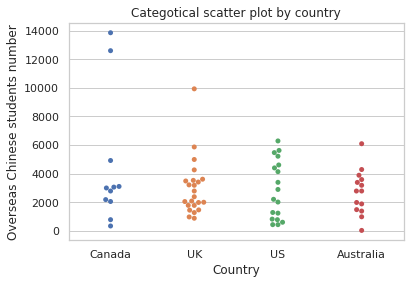

In [41]:
# Categorical scatter plot
non_total = chinese_num_s.iloc[num_of_country:].copy()

sns.set(style="whitegrid")
sns.swarmplot(x=non_total['Country'],
              y=non_total['Overseas Chinese students number'])
plt.title('Categotical scatter plot by country')

# Overseas Chinese student percentage


The tractability to reach Chinese students in the student body

Strategy implication: the effectiveness of direct outreach from university (or country) level platforms are constrained by this percentage.



## By country

In [0]:
chinese_total_pct_s = chinese_num_s.iloc[:num_of_country].sort_values(by='Percentage of All', ascending=False)

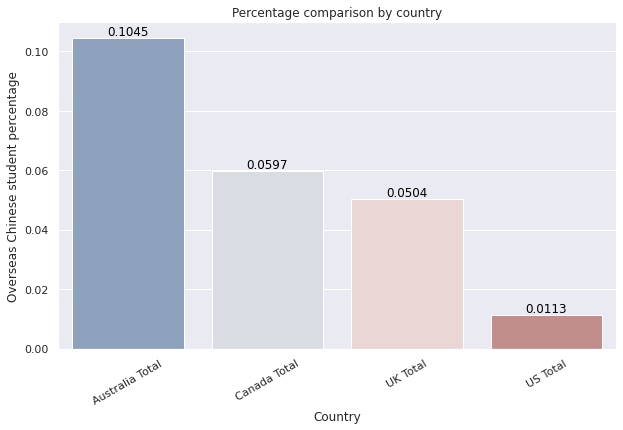

In [43]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.title("Percentage comparison by country")

x=chinese_total_pct_s.index
y=chinese_total_pct_s['Percentage of All']
g = sns.barplot(x=x, y=y, palette="vlag")

plt.ylabel("Overseas Chinese student percentage")
plt.xlabel("Country")
plt.xticks(rotation=30)

for i, v in enumerate(y):
    g.text(i, v+0.001, str(round(v,4)), color='black', ha='center')

## By university

In [0]:
chinese_uni_pct_s = chinese_num_s.iloc[num_of_country:].sort_values(by='Percentage of All', ascending=False)

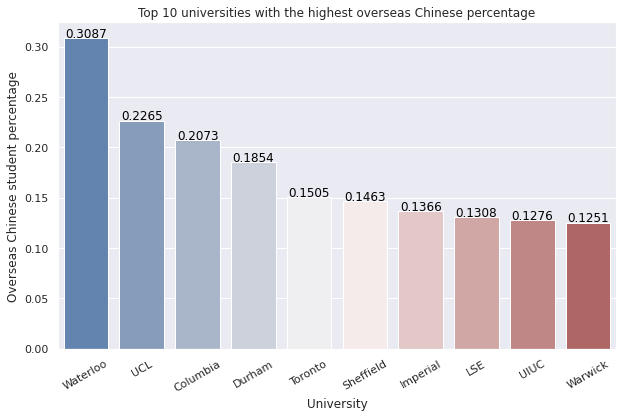

In [45]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.title("Top 10 universities with the highest overseas Chinese percentage")

x=chinese_uni_pct_s.index[:10]
y=chinese_uni_pct_s['Percentage of All'][:10]
g = sns.barplot(x=x, y=y, palette="vlag")

plt.ylabel("Overseas Chinese student percentage")
plt.xlabel("University")
plt.xticks(rotation=30)

for i, v in enumerate(y):
    g.text(i, v+0.001, str(round(v,4)), color='black', ha='center')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Overseas Chinese student percentage')

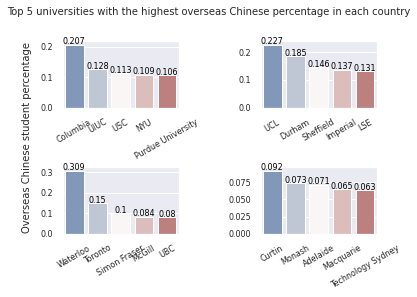

In [46]:
f, axes = plt.subplots(2, 2)
f.tight_layout(pad=3.0)

plt.suptitle("Top 5 universities with the highest overseas Chinese percentage in each country", fontsize=10)

country_list = ['US', 'UK', 'Canada', 'Australia']

for id, country in enumerate(country_list):

  temp_chin_uni_pct_s = chinese_uni_pct_s[chinese_num_s['Country']==country]

  x=temp_chin_uni_pct_s.index[:5]
  y=temp_chin_uni_pct_s['Percentage of All'][:5]
  g = sns.barplot(x=x, y=y, palette="vlag", ax=axes[id // 2, id % 2])

  axes[id // 2, id % 2].set_xticklabels(labels=x, rotation=30)
  axes[id // 2, id % 2].tick_params(labelsize=8)
  axes[id // 2, id % 2].set_ylabel('')    
  axes[id // 2, id % 2].set_xlabel('')


  for i, v in enumerate(y):
      g.text(i, v+0.001, str(round(v,3)), color='black', ha='center', fontsize = 8)

sns.set_style('white')
f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Overseas Chinese student percentage", fontsize=10)

Text(0.5, 1.0, 'Categotical scatter plot by country')

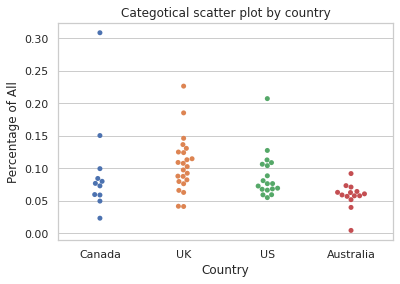

In [47]:
sns.set(style="whitegrid")
sns.swarmplot(x=chinese_uni_pct_s['Country'],
              y=chinese_uni_pct_s['Percentage of All'])
plt.title('Categotical scatter plot by country')

# Unstudied overseas Chinese students


Assume students cannot enroll in more than one university simultaneously.

We look at how many of them are not included in this study.

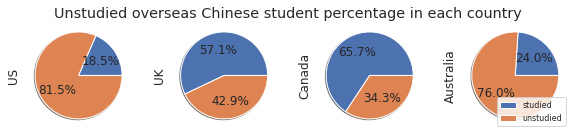

In [82]:
country_list = ['US', 'UK', 'Canada', 'Australia']

df = pd.DataFrame()

for id, country in enumerate(country_list):

  temp_chin_num_s = chinese_num_s[chinese_num_s['Country']==country]

  studied = temp_chin_num_s['Overseas Chinese students number'][1:].sum()
  unstudied = temp_chin_num_s['Overseas Chinese students number'].iloc[0] - studied

  temp = pd.DataFrame({country: [studied, unstudied]},
                  index=['studied', 'unstudied'])
  
  df = pd.concat([df, temp], axis=1)

g = df.plot.pie(subplots=True, labels=None, legend=None,
                figsize=(10, 2), shadow=True, autopct='%1.1f%%',
                title="Unstudied overseas Chinese student percentage in each country")

plt.legend(df.index, loc='lower right', fontsize=8)

In [48]:
'''
# Total student number
total = my_data[my_data['Total students number'].notnull()]
total['Total students number'] = total['Total students number'].astype(int)
total.head()
'''

"\n# Total student number\ntotal = my_data[my_data['Total students number'].notnull()]\ntotal['Total students number'] = total['Total students number'].astype(int)\ntotal.head()\n"